### Module submission group
- Group member 1
    - Name: Michael Visco
    - Email: mjv64@drexel.edu
- Group member 2
    - Name: Harsh Ramesh
    - Email: hr439@drexel.edu
- Group member 3
    - Name: Siddharth Dudugu
    - Email: sd3627@drexel.edu
- Group member 4
    - Name: Arnav Goel
    - Email: ag4273@drexel.edu

In [ ]:
import os
import json
data_folder = "C:/Users/goyal/Downloads/NLP Project/evidence/web"
dataset = []
for root, dirs, files in os.walk(data_folder):
    for file in files:
        file_path = os.path.join(root, file)
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        data_entry = {
            "text": text,
            "label": os.path.basename(root)
        }
        dataset.append(data_entry)

In [ ]:
output_file = "C:/Users/goyal/Downloads/NLP Project/dataset.json"
with open(output_file, "w") as f:
    json.dump(dataset, f)

f

In [ ]:
import pandas as pd

# Define the file path of the CSV dataset
csv_file_path = 'C:/Users/goyal/Downloads/NLP Project/QA_DATA_2.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Access the columns by their names
questions = df['question']
answers = df['answer']
descriptions = df['description']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53683 entries, 0 to 53682
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   question     53683 non-null  object
 1   answer       53673 non-null  object
 2   description  53683 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Preprocessing
df['answer'].fillna('No answer', inplace=True)

In [ ]:
# Exploratory Data Analysis (EDA)
summary_stats = df.describe()
print(summary_stats)

                                                 question     answer  \
count                                               53683      53683   
unique                                               9533       7093   
top     "The song ""Good Morning To All"", composed by...  australia   
freq                                                   10        152   

                                              description  
count                                               53683  
unique                                              53348  
top     You have no Favorite Channels. To follow a cha...  
freq                                                    6  


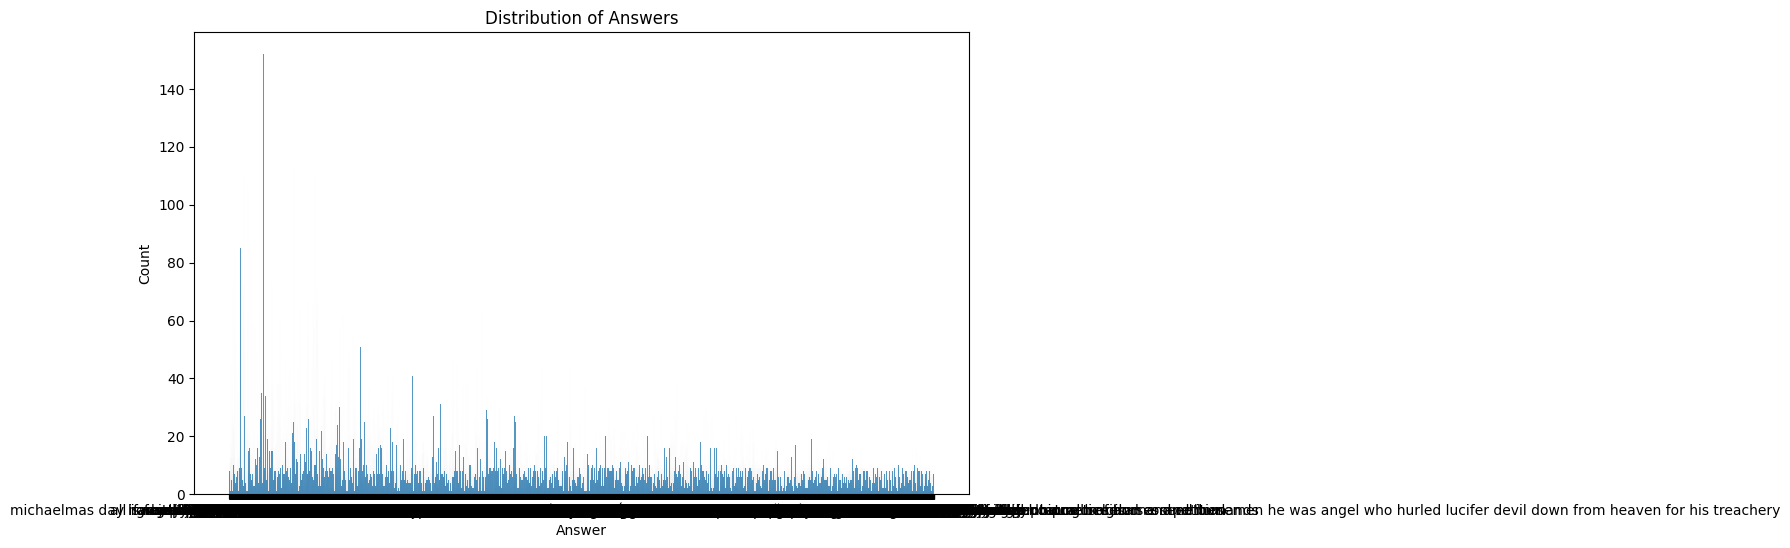

In [ ]:
# Visualize data distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['answer'])
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title('Distribution of Answers')
plt.show()

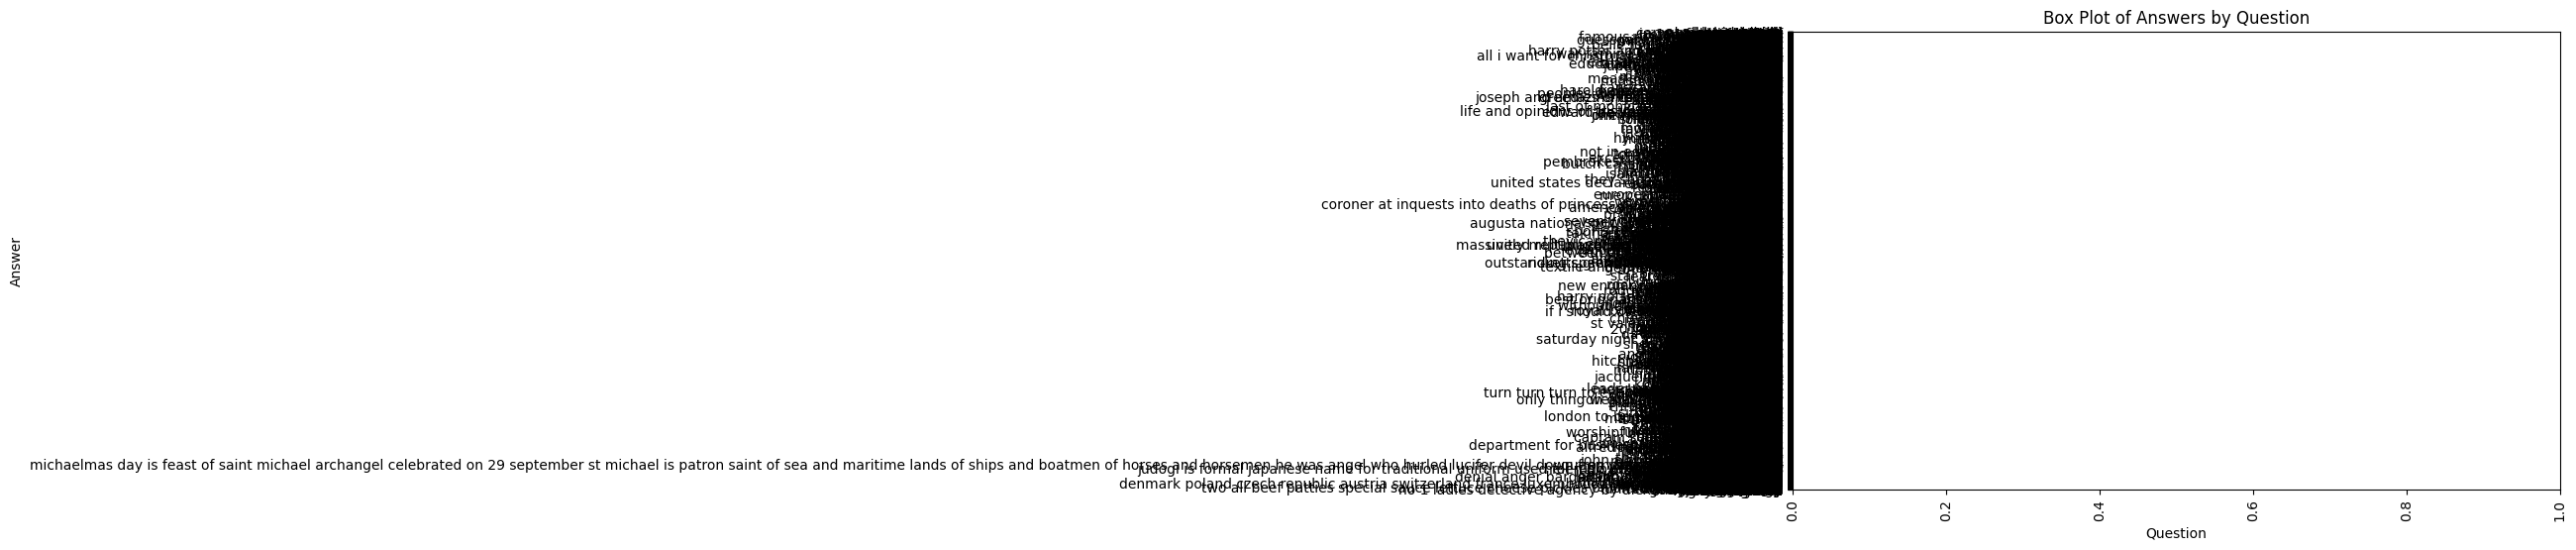

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['question'].value_counts(), y=df['answer'])
plt.xlabel('Question')
plt.ylabel('Answer')
plt.title('Box Plot of Answers by Question')
plt.xticks(rotation=90)
plt.show()

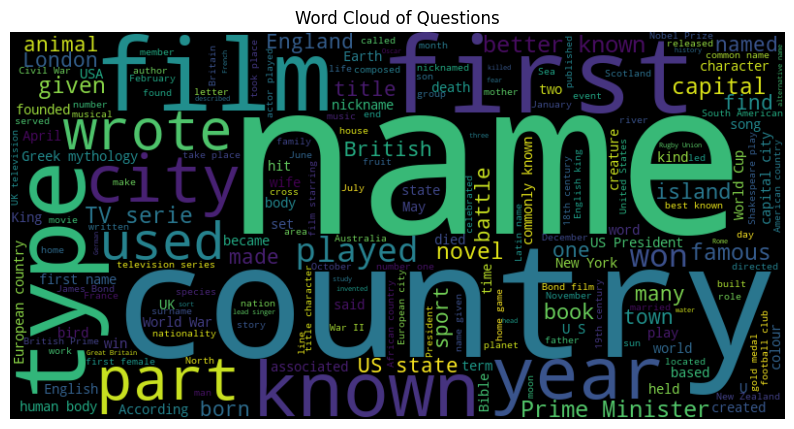

In [ ]:
# Explore text data
from wordcloud import WordCloud

question_text = ' '.join(df['question'])
wordcloud = WordCloud(width=800, height=400).generate(question_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Questions')
plt.show()

In [ ]:
df

,question,answer,description
0,Who was the man behind The Chipmunks?,david seville,A struggling songwriter named Dave Seville fin...
1,Who was the man behind The Chipmunks?,david seville,"The man who brought the Chipmunks to life, ......"
2,Which Lloyd Webber musical premiered in the US...,sunset boulevard,"The official website for Andrew Lloyd Webber, ..."
3,Which Lloyd Webber musical premiered in the US...,sunset boulevard,"Andrew is the composer of The Likes of Us, ......"
4,Which Lloyd Webber musical premiered in the US...,sunset boulevard,Andrew Lloyd Webber and Don Black's Stephen Wa...
...,...,...,...
53678,"According to a popular Christmas song, who was...",frosty snowman,Top 10 Kids Christmas Songs. ... snowman was a...
53679,"According to a popular Christmas song, who was...",frosty snowman,Here is a crossword puzzle that I created whic...
53680,"According to a popular Christmas song, who was...",frosty snowman,"Frosty the snowman was a jolly happy soul, ......"
53681,"According to a popular Christmas song, who was...",frosty snowman,Frosty the Snowman Lyrics. The Christmas Song ...


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Extract the question and answer columns
questions = df['question'].values
answers = df['answer'].values

# Split the dataset into training, validation, and test sets
questions_train, questions_test, answers_train, answers_test = train_test_split(questions, answers, test_size=0.2, random_state=42)
questions_train, questions_val, answers_train, answers_val = train_test_split(questions_train, answers_train, test_size=0.2, random_state=42)

# Convert answers to lowercase
answers_train = [answer.lower() for answer in answers_train]
answers_val = [answer.lower() for answer in answers_val]
answers_test = [answer.lower() for answer in answers_test]

# Create a dictionary to map labels to integers
label_to_int = {}
int_to_label = {}
next_label = 0
for answer in answers_train:
    if answer not in label_to_int:
        label_to_int[answer] = next_label
        int_to_label[next_label] = answer
        next_label += 1

# Encode labels
y_train_encoded = np.array([label_to_int[answer] for answer in answers_train])
y_val_encoded = np.array([label_to_int.get(answer, next_label) for answer in answers_val])
y_test_encoded = np.array([label_to_int.get(answer, next_label) for answer in answers_test])

# Tokenize questions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions_train)
X_train = tokenizer.texts_to_sequences(questions_train)
X_val = tokenizer.texts_to_sequences(questions_val)
X_test = tokenizer.texts_to_sequences(questions_test)

# Pad sequences
max_seq_length = max(len(seq) for seq in X_train + X_val + X_test)
X_train = pad_sequences(X_train, maxlen=max_seq_length)
X_val = pad_sequences(X_val, maxlen=max_seq_length)
X_test = pad_sequences(X_test, maxlen=max_seq_length)

# Define the model architecture
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_seq_length))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_to_int) + 1, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=10, batch_size=64)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
537/537 [==============================] - 36s 66ms/step - loss: 7.8892 - accuracy: 0.0582 - val_loss: 4.6426 - val_accuracy: 0.3960
Epoch 2/10
537/537 [==============================] - 34s 64ms/step - loss: 1.3363 - accuracy: 0.8071 - val_loss: 0.9701 - val_accuracy: 0.8963
Epoch 3/10
537/537 [==============================] - 34s 64ms/step - loss: 0.1534 - accuracy: 0.9711 - val_loss: 0.6944 - val_accuracy: 0.9481
Epoch 4/10
537/537 [==============================] - 35s 64ms/step - loss: 0.0314 - accuracy: 0.9936 - val_loss: 0.7219 - val_accuracy: 0.9542
Epoch 5/10
537/537 [==============================] - 35s 65ms/step - loss: 0.0115 - accuracy: 0.9978 - val_loss: 0.7246 - val_accuracy: 0.9561
Epoch 6/10
537/537 [==============================] - 35s 65ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.7416 - val_accuracy: 0.9576
Epoch 7/10
537/537 [==============================] - 35s 66ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.7556 - val_accuracy:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Load the GloVe word embeddings
embedding_dict = {}
with open('C:/Users/goyal/Downloads/glove.6B/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embedding_dict[word] = embedding

# Extract the question and answer columns
questions = df['question'].values
answers = df['answer'].values

# Split the dataset into training, validation, and test sets
questions_train, questions_test, answers_train, answers_test = train_test_split(questions, answers, test_size=0.2, random_state=42)
questions_train, questions_val, answers_train, answers_val = train_test_split(questions_train, answers_train, test_size=0.2, random_state=42)

# Convert answers to lowercase
answers_train = [answer.lower() for answer in answers_train]
answers_val = [answer.lower() for answer in answers_val]
answers_test = [answer.lower() for answer in answers_test]

# Create a dictionary to map labels to integers
label_to_int = {}
int_to_label = {}
next_label = 0
for answer in answers_train:
    if answer not in label_to_int:
        label_to_int[answer] = next_label
        int_to_label[next_label] = answer
        next_label += 1

# Encode labels
y_train_encoded = np.array([label_to_int[answer] for answer in answers_train])
y_val_encoded = np.array([label_to_int.get(answer, next_label) for answer in answers_val])
y_test_encoded = np.array([label_to_int.get(answer, next_label) for answer in answers_test])

# Tokenize questions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions_train)
X_train = tokenizer.texts_to_sequences(questions_train)
X_val = tokenizer.texts_to_sequences(questions_val)
X_test = tokenizer.texts_to_sequences(questions_test)

# Pad sequences
max_seq_length = max(len(seq) for seq in X_train + X_val + X_test)
X_train = pad_sequences(X_train, maxlen=max_seq_length)
X_val = pad_sequences(X_val, maxlen=max_seq_length)
X_test = pad_sequences(X_test, maxlen=max_seq_length)

# Create an embedding matrix
num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define the model architecture
model_glove = Sequential()
model_glove.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length=max_seq_length, trainable=False))
model_glove.add(Flatten())
model_glove.add(Dense(256, activation='relu'))
model_glove.add(Dense(len(label_to_int) + 1, activation='softmax'))

# Compile the model
model_glove.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_glove.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=10, batch_size=64)

# Evaluate the model on the test set
loss, accuracy = model_glove.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
537/537 [==============================] - 34s 63ms/step - loss: 5.9784 - accuracy: 0.2594 - val_loss: 1.7617 - val_accuracy: 0.7562
Epoch 2/10
537/537 [==============================] - 32s 59ms/step - loss: 0.4688 - accuracy: 0.9189 - val_loss: 0.6683 - val_accuracy: 0.9350
Epoch 3/10
537/537 [==============================] - 32s 60ms/step - loss: 0.0698 - accuracy: 0.9847 - val_loss: 0.6370 - val_accuracy: 0.9474
Epoch 4/10
537/537 [==============================] - 32s 60ms/step - loss: 0.0334 - accuracy: 0.9917 - val_loss: 0.6230 - val_accuracy: 0.9518
Epoch 5/10
537/537 [==============================] - 33s 61ms/step - loss: 0.0225 - accuracy: 0.9944 - val_loss: 0.6355 - val_accuracy: 0.9536
Epoch 6/10
537/537 [==============================] - 33s 61ms/step - loss: 0.0194 - accuracy: 0.9960 - val_loss: 0.6276 - val_accuracy: 0.9541
Epoch 7/10
537/537 [==============================] - 33s 61ms/step - loss: 0.0147 - accuracy: 0.9963 - val_loss: 0.6477 - val_accuracy:

In [ ]:
import pandas as pd
import numpy as np
import torch
import transformers
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Extract the question and answer columns
questions = df['question'].values
answers = df['answer'].values

# Split the dataset into training, validation, and test sets
questions_train, questions_test, answers_train, answers_test = train_test_split(
    questions, answers, test_size=0.2, random_state=42
)
questions_train, questions_val, answers_train, answers_val = train_test_split(
    questions_train, answers_train, test_size=0.2, random_state=42
)

# Convert answers to lowercase
answers_train = [answer.lower() for answer in answers_train]
answers_val = [answer.lower() for answer in answers_val]
answers_test = [answer.lower() for answer in answers_test]

# Create a dictionary to map labels to integers
label_to_int = {}
int_to_label = {}
next_label = 0
for answer in answers_train:
    if answer not in label_to_int:
        label_to_int[answer] = next_label
        int_to_label[next_label] = answer
        next_label += 1

# Encode labels
y_train_encoded = np.array([label_to_int[answer] for answer in answers_train])
y_val_encoded = np.array([label_to_int.get(answer, next_label) for answer in answers_val])
y_test_encoded = np.array([label_to_int.get(answer, next_label) for answer in answers_test])

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize questions
X_train = tokenizer.batch_encode_plus(
    questions_train.tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt'
)
X_val = tokenizer.batch_encode_plus(
    questions_val.tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt'
)
X_test = tokenizer.batch_encode_plus(
    questions_test.tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt'
)

# Convert the tokenized sequences to PyTorch tensors
X_train_input_ids = X_train['input_ids']
X_train_attention_mask = X_train['attention_mask']
X_val_input_ids = X_val['input_ids']
X_val_attention_mask = X_val['attention_mask']
X_test_input_ids = X_test['input_ids']
X_test_attention_mask = X_test['attention_mask']

# Load the BERT model with reduced size (option 2)
model_bert = BertModel.from_pretrained('bert-base-uncased')

# Reduce the batch size (option 1)
batch_size = 16

# Generate embeddings for the input sequences
with torch.no_grad():
    X_train_embeddings = []
    for i in range(0, len(X_train_input_ids), batch_size):
        embeddings = model_bert(
            input_ids=X_train_input_ids[i:i+batch_size],
            attention_mask=X_train_attention_mask[i:i+batch_size]
        )[0].numpy()
        X_train_embeddings.append(embeddings)
    X_train_embeddings = np.concatenate(X_train_embeddings)

    X_test_embeddings = []
    for i in range(0, len(X_test_input_ids), batch_size):
        embeddings = model_bert(
            input_ids=X_test_input_ids[i:i+batch_size],
            attention_mask=X_test_attention_mask[i:i+batch_size]
        )[0].numpy()
        X_test_embeddings.append(embeddings)
    X_test_embeddings = np.concatenate(X_test_embeddings)

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(X_train_embeddings.shape[1], X_train_embeddings.shape[2])))
model.add(Dense(512, activation='relu'))
model.add(Dense(len(label_to_int), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_embeddings, y_train_encoded,
    validation_data=(X_val_embeddings, y_val_encoded),
    batch_size=32,  # Change batch_size to the desired value
    epochs=10
)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test_embeddings, y_test_encoded)
print('Test accuracy:', accuracy)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
